In [ ]:
import librosa

import numpy as np
import pandas as pd
import os

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import layers 

import matplotlib.pyplot as plt
from IPython import display
from IPython.display import clear_output

import glob
import imageio
import time
import IPython.display as ipd

import os
import tensorflow as tf
from music_vae import config
from data_loader import DatasetLoader, create_datasets
from model import CVAE
from train import train_step
from generate import generate_and_save_images, create_animation
from utils import play_audio
from train import compute_loss
from generate import inference



/opt/conda/lib/python3.7/site-packages/tensorflow_addons/utils/ensure_tf_install.py:68: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.2.0 and strictly below 2.3.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.3.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [ ]:

ds = 'classical'

# Load track lists
TrackSet_1, TrackSet_2 = DatasetLoader(ds)

# Create train and test datasets
train_dataset, test_dataset = create_datasets(TrackSet_1, TrackSet_2, config.BATCH_SIZE)


In [10]:
TrackSet_3, TrackSet_4 = DatasetLoader('classical')

In [ ]:
# Initialize model and optimizer
model = CVAE(config.latent_dim)
optimizer = tf.keras.optimizers.Adam(1e-4)

# Select fixed sample for generating outputs during training
example_data = next(iter(test_dataset))
test_sample = example_data[:config.num_examples_to_generate, :, :]


In [ ]:
# Training Loop

import time

for epoch in range(1, config.epochs + 1):
    start_time = time.time()

    for train_x in train_dataset:
        train_step(model, train_x, optimizer)

    end_time = time.time()
    loss = tf.keras.metrics.Mean()
    for test_x in test_dataset:
        loss(compute_loss(model, test_x))

    print(f"Epoch {epoch}, Test Loss: {loss.result():.4f}, Time: {end_time - start_time:.2f}s")

    generate_and_save_images(model, epoch, test_sample, "vae_epoch")


Epoch: 20, Test set ELBO: -18784.6953125, time elapse for current epoch: 171.78272938728333


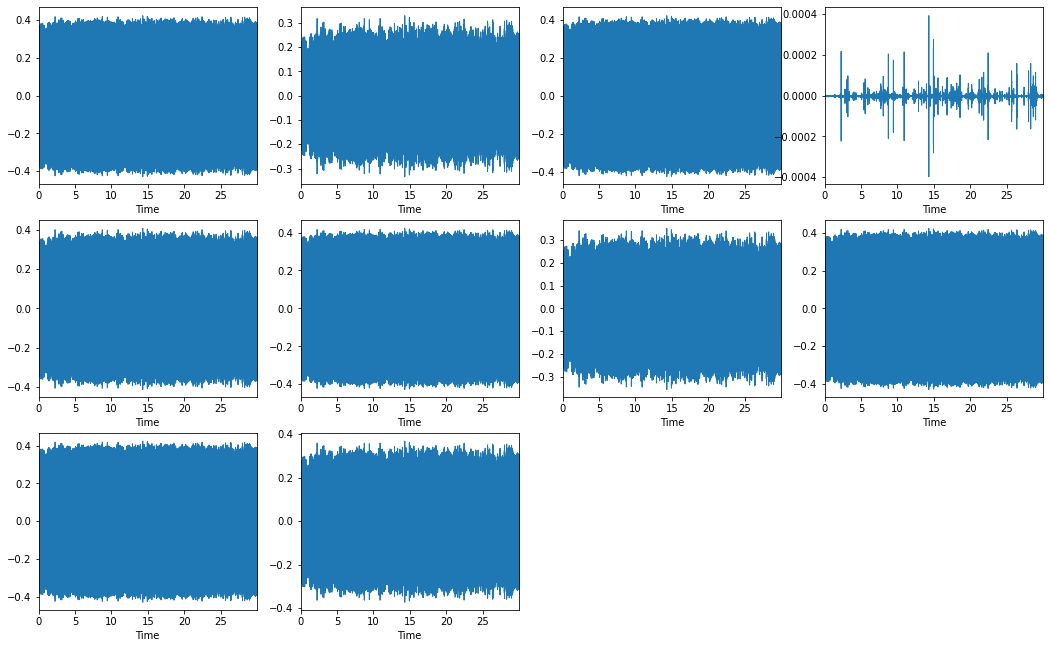

In [ ]:
generate_and_save_images(model, 0, test_sample, 'classical')   

In [ ]:
save_music_classic = inference(test_dataset, model)

In [45]:
music1=save_music_classic[1][0]
ipd.Audio(music1,rate=3000)

In [46]:
music2=save_music_classic[9][0]
ipd.Audio(music2,rate=3000)

In [48]:
music3=save_music_classic[4][0]
ipd.Audio(music3,rate=3000)

In [49]:
music4=save_music_classic[5][0]
ipd.Audio(music4,rate=3000)

In [50]:
music5=save_music_classic[8][0]
ipd.Audio(music5,rate=3000)

In [51]:
music6=save_music_classic[7][0]
ipd.Audio(music6,rate=3000)